0. Author: Md Rakib Hasan
1. Date: 19-3-2023

# Project:Mobile Phone Price Data Analysis and Feature Engineering

About: This dataset contains information on the prices of several mobile phones from different brands. It includes details such as the storage capacity, RAM, screen size, camera specifications, battery capacity, and price of each device.
Columns
1. • Brand: the manufacturer of the phone
2. • Model: the name of the phone model
3. • Storage (GB): the amount of storage space (in gigabytes) available on the phone
4. • RAM (GB): the amount of RAM (in gigabytes) available on the phone
5. • Screen Size (inches): the size of the phone's display screen in inches
6. • Camera (MP): the megapixel count of the phone's rear camera(s)
7. • Battery Capacity (mAh): the capacity of the phone's battery in milliampere hours
8. • Price ($): the retail price of the phone in US dollars
Each row represents a different mobile phone model. The data can be used to analyze pricing trends and compare the features and prices of different mobile phones.

# Import Library:

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Data Gathering:

In [7]:
df=pd.read_csv('Mobile phone price.csv')
df

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799
...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429


# Understanding Data:

In [8]:
# show first five rows
df.head(5)

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [9]:
# show last five rows
df.tail(5)

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429
406,Samsung,Galaxy S10 Lite,128,6,6.7,48+12+5,4500,649


In [10]:
# show random five rows
df.sample(5)

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
387,Samsung,Galaxy S21,128,8,6.2,64+12+12,4000,799
195,Oppo,A74 5G,128GB,6GB,6.5,48MP + 2MP + 2MP,5000,$299
213,Xiaomi,Poco X3 Pro,128GB,6GB,6.67,48MP + 8MP + 2MP + 2MP,5160,$299
288,Samsung,Galaxy Note 20 Ultra,256,12,6.9,108+12+12,4500,1299
101,CAT,S42,32GB,3GB,5.5,13MP + 5MP,4200,$299


In [12]:
# show data columns
df.columns

Index(['Brand', 'Model', 'Storage ', 'RAM ', 'Screen Size (inches)',
       'Camera (MP)', 'Battery Capacity (mAh)', 'Price ($)'],
      dtype='object')

In [13]:
# show data shape
df.shape

(407, 8)

In [14]:
# show data types
df.dtypes

Brand                     object
Model                     object
Storage                   object
RAM                       object
Screen Size (inches)      object
Camera (MP)               object
Battery Capacity (mAh)     int64
Price ($)                 object
dtype: object

In [15]:
# show basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


# Data Cleaning:

In [16]:
#rename columns
df.rename(columns={"Screen Size (inches)":"Screen_Size","Camera (MP)":"Camera","Battery Capacity (mAh)":"Battery_Capacity","Price ($)":"Price"},inplace=True)

In [28]:
#change data type price column
df['Price']=df['Price'].str.replace('$',' ')
df['Price']=df['Price'].str.replace(',',' ')
df['Price']=df['Price'].str.replace(' ','')

In [29]:
#change data type price column
df['Price']=df['Price'].astype('int')

In [30]:
df.head(2)

,Brand,Model,Storage,RAM,Screen_Size,Camera,Battery_Capacity,Price
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199


In [39]:
df['Storage']=df['Storage'].str.replace('GB','')
df['RAM']=df['RAM'].str.replace('GB','')

KeyError: 'Storage'

In [41]:
#check duplicated Value
df.duplicated().sum()

26

In [42]:
#drop duplicatd values
df.drop_duplicates(inplace=True)

In [43]:
df.duplicated().sum()

0

In [44]:
#check null value
df.isnull().sum()

Brand               0
Model               0
Storage             0
RAM                 0
Screen_Size         0
Camera              0
Battery_Capacity    0
Price               0
dtype: int64

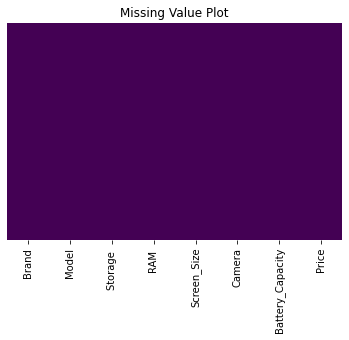

In [45]:
#plot null values
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis',cbar=False)
plt.title('Missing Value Plot');

# Feature Engineering:

In [46]:
#create new feature
df['n_camera']=df['Camera'].str.count("\\+")+1

In [50]:
res1=[]
res2=[]
res3=[]
res4=[]

for x in df['Camera']:
    res=x.split('+')
    tam=len(res)
    
    if tam==1:
        res1.append(res[0])
        res2.append("0")
        res3.append("0")
        res4.append("0")
    if tam==2:
        res1.append(res[0])
        res2.append(res[1])
        res3.append("0")
        res4.append("0")
    if tam==3:
        res1.append(res[0])
        res2.append(res[1])
        res3.append(res[2])
        res4.append("0")
    if tam==4:
        res1.append(res[0])
        res2.append(res[1])
        res3.append(res[2])
        res4.append(res[3])
df['Res1']=res1
df['Res2']=res2
df['Res3']=res3
df['Res4']=res4

In [52]:
df.drop(columns=['Camera'],axis=1,inplace=True)

In [53]:
df

,Brand,Model,Storage,RAM,Screen_Size,Battery_Capacity,Price,n_camera,Res1,Res2,Res3,Res4
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,3095,999,3,12,12,12,0
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,5000,1199,4,108,10,10,12
2,OnePlus,9 Pro,128 GB,8 GB,6.7,4500,899,4,48,50,8,2
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,5020,279,4,64,8,5,2
4,Google,Pixel 6,128 GB,8 GB,6.4,4614,799,2,50,12.2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
401,Huawei,P30 Lite,128,4,6.15,3340,329,3,48,8,2,0
402,Samsung,Galaxy Note20 5G,128,8,6.7,4300,1049,3,12,64,12,0
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,4160,349,4,48,8,2,2
404,Apple,iPhone 12 Pro Max,128,6,6.7,3687,1099,3,12,12,12,0


In [56]:
df['Res1']=df['Res1'].str.replace('MP','')
df['Res2']=df['Res1'].str.replace('MP','')
df['Res3']=df['Res1'].str.replace('MP','')
df['Res4']=df['Res1'].str.replace('MP','')

In [64]:
df['Price'] = pd.to_numeric(df['Price'])

df['Res1'] = pd.to_numeric(df['Res1'])

df['Res2'] = pd.to_numeric(df['Res2'])

df['Res3'] = pd.to_numeric(df['Res3'])

df['Res4'] = pd.to_numeric(df['Res4'])
df['Battery_Capacity'] = pd.to_numeric(df['Battery_Capacity'])

In [92]:
df['Screen_Size']=df['Screen_Size'].str.replace('+','')
df['Screen_Size']=df['Screen_Size'].str.replace('(unfolded)','')
df['Screen_Size']=df['Screen_Size'].str.replace('()','')

In [93]:
df['Screen_Size'].unique()

array(['6.1', '6.8', '6.7', '6.67', '6.4', '6.55', '6.78', '6.43', '6.5',
       '6.62', '5.4', '6.2', '6.51', '6.6', '4.7', '6.58', '6.52', '6.44',
       '6.53', '6.56', '6.8  3.9', '4.5', '6.39', '5.9', '5.5', '6.81',
       '5.99', '6.82', '6.3', '6.22', '6', '6.35', '6.9', '6.76', '6.49',
       '6.72', '5.7', '6.47', '7.6 ()', '6.15', '6.57'], dtype=object)

In [68]:
df['Model'].str.lower()
df

,Brand,Model,Storage,RAM,Screen_Size,Battery_Capacity,Price,n_camera,Res1,Res2,Res3,Res4
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,3095,999,3,12.0,12.0,12.0,12.0
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,5000,1199,4,108.0,108.0,108.0,108.0
2,OnePlus,9 Pro,128 GB,8 GB,6.7,4500,899,4,48.0,48.0,48.0,48.0
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,5020,279,4,64.0,64.0,64.0,64.0
4,Google,Pixel 6,128 GB,8 GB,6.4,4614,799,2,50.0,50.0,50.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
401,Huawei,P30 Lite,128,4,6.15,3340,329,3,48.0,48.0,48.0,48.0
402,Samsung,Galaxy Note20 5G,128,8,6.7,4300,1049,3,12.0,12.0,12.0,12.0
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,4160,349,4,48.0,48.0,48.0,48.0
404,Apple,iPhone 12 Pro Max,128,6,6.7,3687,1099,3,12.0,12.0,12.0,12.0


In [140]:
df.Brand.unique()

array(['Apple', 'Samsung', 'OnePlus', 'Xiaomi', 'Google', 'Oppo', 'Vivo',
       'Realme', 'Motorola', 'Nokia', 'Sony', 'LG', 'Asus', 'Blackberry',
       'CAT', 'Huawei'], dtype=object)

In [141]:
df[['Country','Continent']]=np.nan

In [145]:
for index,Brand in enumerate(df['Brand']):
    if Brand in ['Apple','Cat','Google', 'Motorola']:
        df.loc[index,'Country']='America'
        df.loc[index,'Continent']='North America'
        
    elif Brand in ['Blackberry']:
        df.loc[index,'Country'] = 'canada'
        df.loc[index,'Continent'] = 'north america'
    
    elif Brand in ['Nokia']:
        df.loc[index,'Country'] = 'finland'
        df.loc[index,'Continent'] = 'europa'
        
    elif Brand in ['Samsung','LG']:
        df.loc[index,'Country'] = 'south korean'
        df.loc[index,'Continent'] = 'asia'
    else:
        df.loc[index,'Country'] = 'china'
        df.loc[index,'Continent'] = 'asia'

In [146]:
df

,Brand,Model,Storage,RAM,Screen_Size,Battery_Capacity,Price,n_camera,Res1,Res2,Res3,Res4,Country,Continent
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,3095.0,999.0,3.0,12.0,12.0,12.0,12.0,America,North America
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,5000.0,1199.0,4.0,108.0,108.0,108.0,108.0,south korean,asia
2,OnePlus,9 Pro,128 GB,8 GB,6.7,4500.0,899.0,4.0,48.0,48.0,48.0,48.0,china,asia
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,5020.0,279.0,4.0,64.0,64.0,64.0,64.0,china,asia
4,Google,Pixel 6,128 GB,8 GB,6.4,4614.0,799.0,2.0,50.0,50.0,50.0,50.0,America,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,America,North America
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,china,asia
357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,china,asia
365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,south korean,asia


# Exploratory Data Analysis:

Target Variable: Price

1.6062116576351178


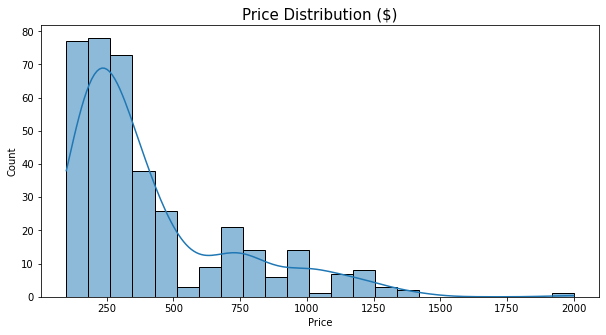

In [75]:
#Price column distribution
plt.figure(figsize=(10,5))
sns.histplot(data=df,x=df['Price'],kde=True)
plt.title('Price Distribution ($)',fontsize=15);
print(df['Price'].skew())

Conclusion: Most the phone price range between 250-500($). Few phone price range between 750-1250($).

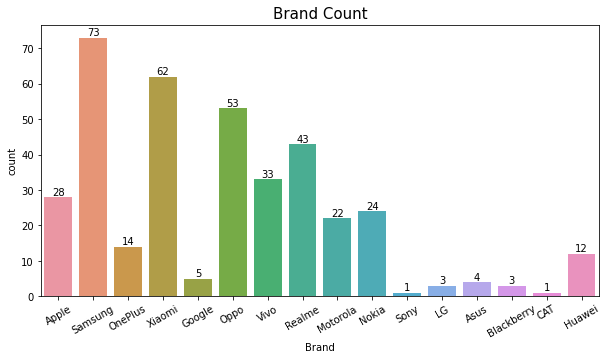

In [83]:
#Brand Columns
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df,x=df['Brand'])
plt.xticks(rotation=30)
plt.title('Brand Count',fontsize=15)
for i in ax.containers:
    ax.bar_label(i,)

conclusion: Highest phone brand name Samsung and second phone brand name xiaomi.

-0.5338419297861744


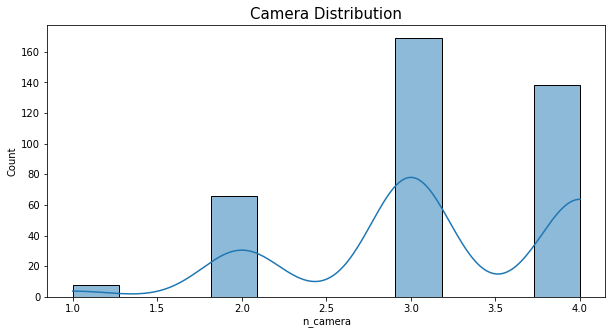

In [96]:
#Price column distribution
plt.figure(figsize=(10,5))
sns.histplot(data=df,x=df['n_camera'],kde=True)
plt.title('Camera Distribution',fontsize=15);
print(df['n_camera'].skew())

Conclusion: Most Of the phone has 3 and 4 camera

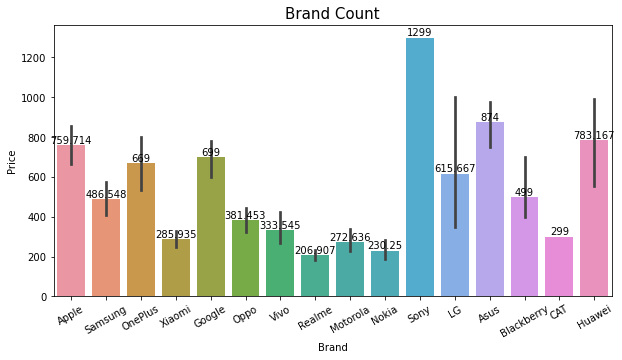

In [97]:
#Brand Columns
plt.figure(figsize=(10,5))
ax=sns.barplot(data=df,x=df['Brand'],y=df['Price'])
plt.xticks(rotation=30)
plt.title('Brand Count',fontsize=15)
for i in ax.containers:
    ax.bar_label(i,)

# What is the most expensive cell phone?

In [102]:
df[['Brand','Model','Price']].sort_values(by='Price',ascending=False)[:5]

,Brand,Model,Price
373,Samsung,Galaxy Z Fold2 5G,1999
361,Huawei,P40 Pro+,1399
367,Samsung,Galaxy S20 Ultra 5G,1399
87,Sony,Xperia 5 III,1299
57,Apple,iPhone 13 Pro Max,1299


Conclusion: Most Expensive cell phone Brand name Samsung and Brande name Galaxy Z Fold2 5G.

# What is the most frequent brand?

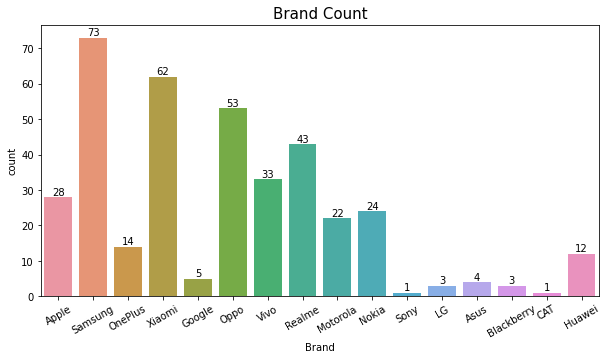

In [103]:
#Brand Columns
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df,x=df['Brand'])
plt.xticks(rotation=30)
plt.title('Brand Count',fontsize=15)
for i in ax.containers:
    ax.bar_label(i,)

Samsung Brand of the entire dataset and is the most frequent brand.

The second most frequent brand is Xiaomi

Third is Oppo .

# On average, which is the most expensive and cheapest brand?

In [109]:
costs=df.groupby('Brand')['Price'].mean().sort_values(ascending=False)
for Brand,Price in costs.items():
    print(f"On Average {Brand.capitalize()} costs ${round(Price,2)}")

On Average Sony costs $1299.0
On Average Asus costs $874.0
On Average Huawei costs $783.17
On Average Apple costs $759.71
On Average Google costs $699.0
On Average Oneplus costs $669.0
On Average Lg costs $615.67
On Average Blackberry costs $499.0
On Average Samsung costs $486.55
On Average Oppo costs $381.45
On Average Vivo costs $333.55
On Average Cat costs $299.0
On Average Xiaomi costs $285.94
On Average Motorola costs $272.64
On Average Nokia costs $230.25
On Average Realme costs $206.91


Conclusion: Most Expensive Brand Name is Asus & Cheapest Brand Name is Realme

# What is the most expensive and cheapest cell phone for the top 10 brands?

In [117]:
top_10_brands_expensive=df.groupby('Brand')['Price'].mean().sort_values(ascending=False)[:10]

In [118]:
top_10_brands_expensive

Brand
Sony          1299.000000
Asus           874.000000
Huawei         783.166667
Apple          759.714286
Google         699.000000
OnePlus        669.000000
LG             615.666667
Blackberry     499.000000
Samsung        486.547945
Oppo           381.452830
Name: Price, dtype: float64

In [123]:
top_10_brands_chep=df.groupby('Brand')['Price'].mean().sort_values(ascending=False)[-10:]

In [124]:
top_10_brands_chep

Brand
LG            615.666667
Blackberry    499.000000
Samsung       486.547945
Oppo          381.452830
Vivo          333.545455
CAT           299.000000
Xiaomi        285.935484
Motorola      272.636364
Nokia         230.250000
Realme        206.906977
Name: Price, dtype: float64

# Corelation:

In [125]:
num=["Battery_Capacity","n_camera","Res1","Res2","Res3","Res4"]

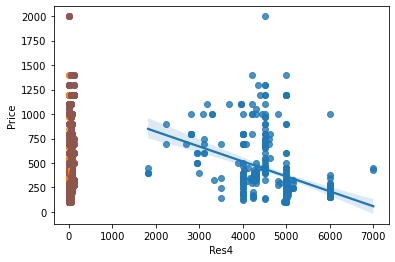

In [126]:
 sns.regplot(y=df['Price'],x=df[fea])

<AxesSubplot:xlabel='n_camera', ylabel='Price'>

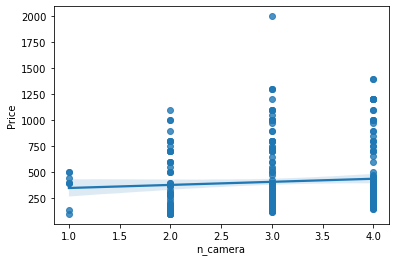

In [134]:
sns.regplot(y=df['Price'],x=df["n_camera"])

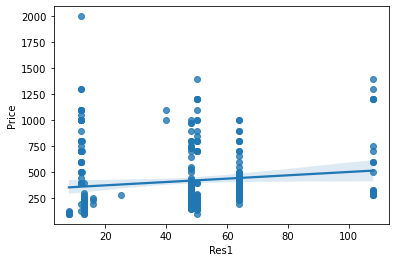

In [136]:
sns.regplot(y=df['Price'],x=df["Res1"]);

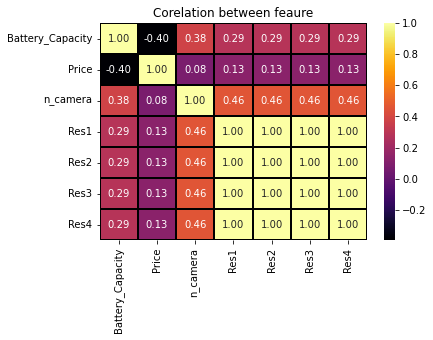

In [139]:
correlation =df.corr()

sns.heatmap(correlation,annot=True,fmt='.2f',linecolor='black', linewidths=2, cmap='inferno')
plt.title('Corelation between feaure');

In [147]:
df

,Brand,Model,Storage,RAM,Screen_Size,Battery_Capacity,Price,n_camera,Res1,Res2,Res3,Res4,Country,Continent
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,3095.0,999.0,3.0,12.0,12.0,12.0,12.0,America,North America
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,5000.0,1199.0,4.0,108.0,108.0,108.0,108.0,south korean,asia
2,OnePlus,9 Pro,128 GB,8 GB,6.7,4500.0,899.0,4.0,48.0,48.0,48.0,48.0,china,asia
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,5020.0,279.0,4.0,64.0,64.0,64.0,64.0,china,asia
4,Google,Pixel 6,128 GB,8 GB,6.4,4614.0,799.0,2.0,50.0,50.0,50.0,50.0,America,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,America,North America
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,china,asia
357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,china,asia
365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,south korean,asia


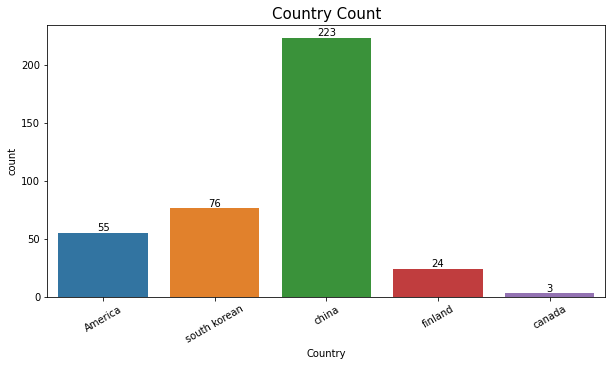

In [148]:
#Country Columns
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df,x=df['Country'])
plt.xticks(rotation=30)
plt.title('Country Count',fontsize=15)
for i in ax.containers:
    ax.bar_label(i,)

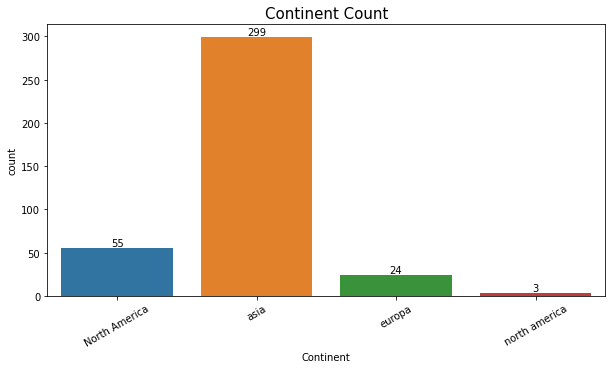

In [149]:
#Country Columns
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df,x=df['Continent'])
plt.xticks(rotation=30)
plt.title('Continent Count',fontsize=15)
for i in ax.containers:
    ax.bar_label(i,)

Conclusion:
We saw that Samsung has the most expensive cell phone, and Samsung makes up (proportionally) 60% of the most expensive top 10 brands.

Samsung is also the most frequent brand in our dataset, accounting for 17.75% of all data.

The most expensive brand is Asus (on average 874 dollars) and Realme the cheapest (on average 208 dollars). Asus only has a four cell phones in our dataset, so it might be interesting to consider more frequent brands.

We saw that most features have some linear correlation with price, however, some features are correlated with others and this may indicate multicollinearity. We can measure this with the Variation Inflation Error.